In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import matplotlib as mpl

In [27]:
file_path1 = 'DailyDelhiClimateTrain.csv'
data = pd.read_csv(file_path1)
data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [28]:
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month
data['day'] = pd.DatetimeIndex(data['date']).day
data = data.iloc[:,[0,7,6,5,1,2,3,4]]
data = data.drop(1461)
data

,date,day,month,year,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,1,1,2013,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,2,1,2013,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,3,1,2013,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,4,1,2013,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,5,1,2013,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...,...,...,...
1456,2016-12-27,27,12,2016,16.850000,67.550000,8.335000,1017.200000
1457,2016-12-28,28,12,2016,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,29,12,2016,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,30,12,2016,14.095238,89.666667,6.266667,1017.904762


In [29]:
by_year = data.groupby('year').count()
by_year

,date,day,month,meantemp,humidity,wind_speed,meanpressure
year,,,,,,,
2013,365,365,365,365,365,365,365
2014,365,365,365,365,365,365,365
2015,365,365,365,365,365,365,365
2016,366,366,366,366,366,366,366


In [30]:
data['year'] = data['year'].values.astype('str')
data['month'] = data['month'].values.astype('str')
data['day'] = data['day'].values.astype('str')
data

,date,day,month,year,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,1,1,2013,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,2,1,2013,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,3,1,2013,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,4,1,2013,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,5,1,2013,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...,...,...,...
1456,2016-12-27,27,12,2016,16.850000,67.550000,8.335000,1017.200000
1457,2016-12-28,28,12,2016,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,29,12,2016,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,30,12,2016,14.095238,89.666667,6.266667,1017.904762


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1461 non-null   object 
 1   day           1461 non-null   object 
 2   month         1461 non-null   object 
 3   year          1461 non-null   object 
 4   meantemp      1461 non-null   float64
 5   humidity      1461 non-null   float64
 6   wind_speed    1461 non-null   float64
 7   meanpressure  1461 non-null   float64
dtypes: float64(4), object(4)
memory usage: 91.4+ KB


In [32]:
# Let's make sure 'date' is actually a date in pandas
data["date"] = pd.to_datetime(data["date"])

# Setting our date column as our index column
data = data.set_index('date')
data

,day,month,year,meantemp,humidity,wind_speed,meanpressure
date,,,,,,,
2013-01-01,1,1,2013,10.000000,84.500000,0.000000,1015.666667
2013-01-02,2,1,2013,7.400000,92.000000,2.980000,1017.800000
2013-01-03,3,1,2013,7.166667,87.000000,4.633333,1018.666667
2013-01-04,4,1,2013,8.666667,71.333333,1.233333,1017.166667
2013-01-05,5,1,2013,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...,...,...
2016-12-27,27,12,2016,16.850000,67.550000,8.335000,1017.200000
2016-12-28,28,12,2016,17.217391,68.043478,3.547826,1015.565217
2016-12-29,29,12,2016,15.238095,87.857143,6.000000,1016.904762


In [33]:
mean_temperature = data['meantemp']
humidity = data['humidity']
wind_speed = data['wind_speed']
meanpressure = data['meanpressure']

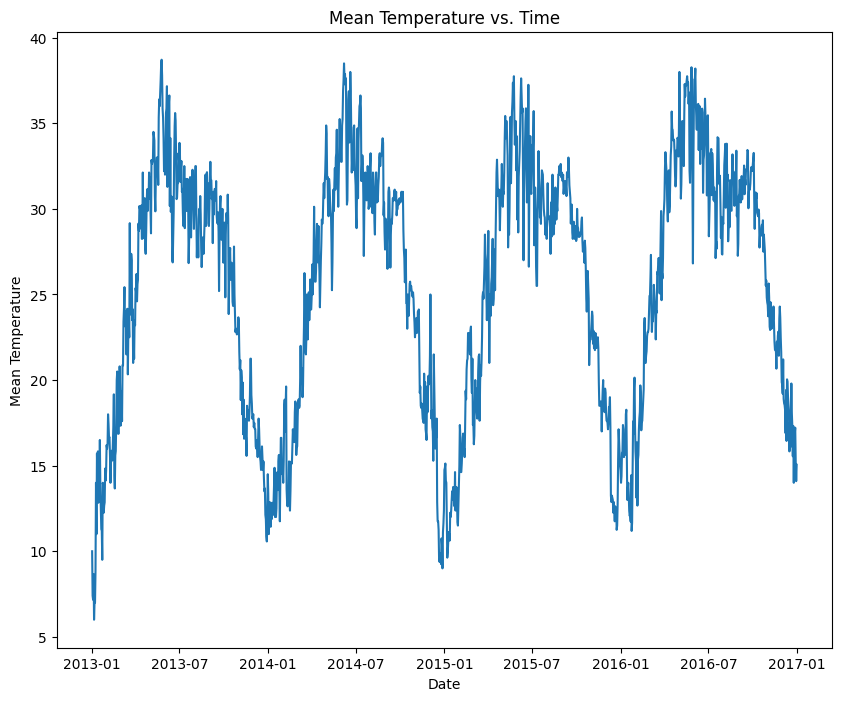

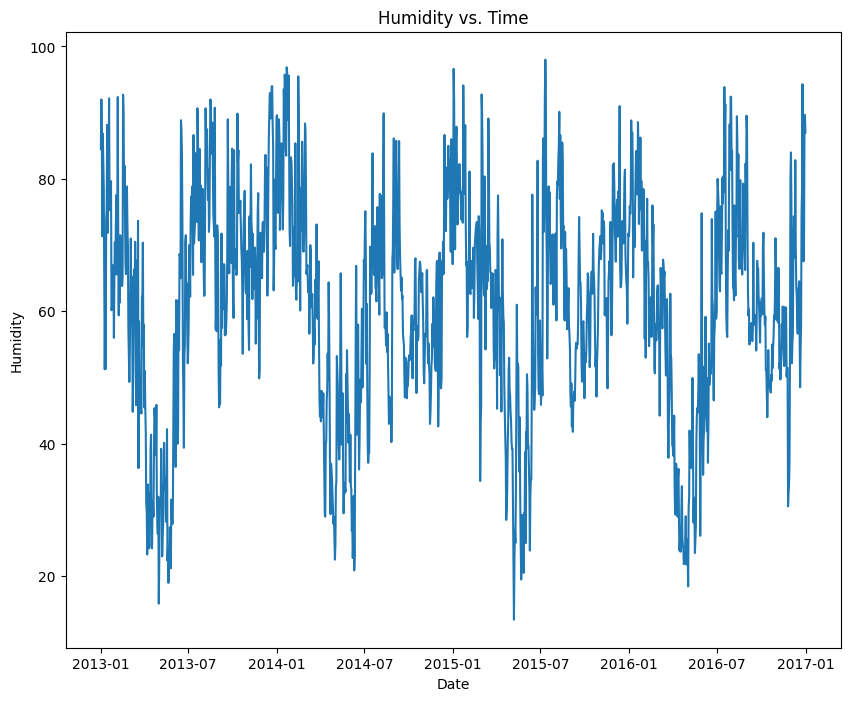

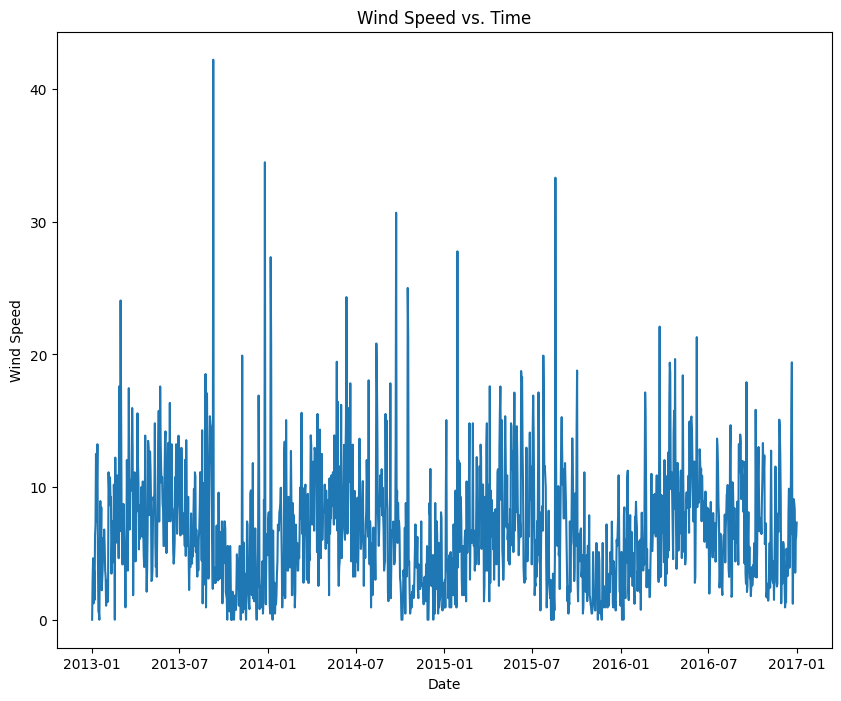

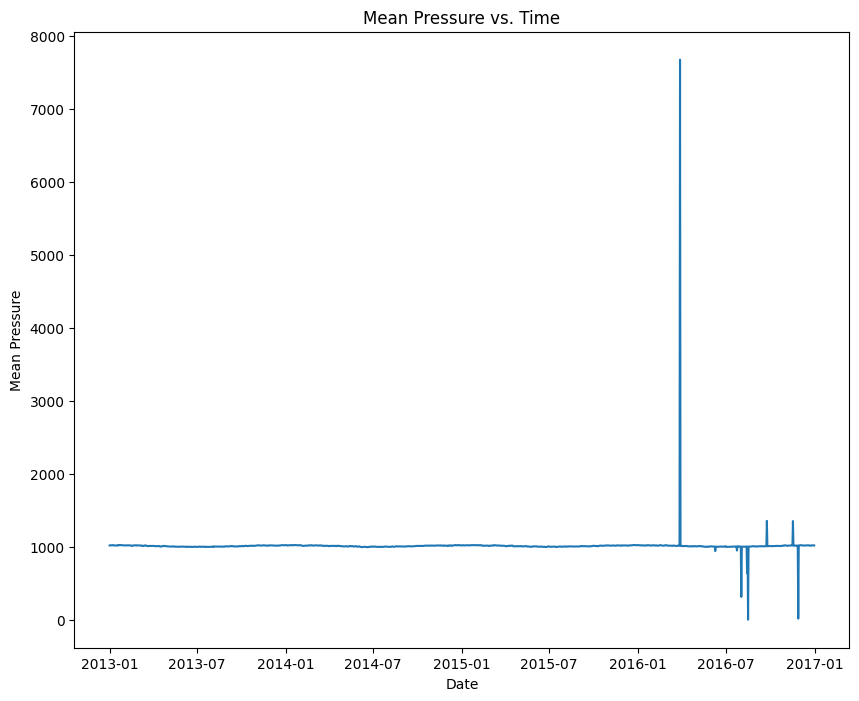

In [34]:
# List of data and corresponding labels
data_columns = [(mean_temperature, 'Mean Temperature'), (humidity, 'Humidity'), (wind_speed, 'Wind Speed'), (meanpressure, 'Mean Pressure')]

# Create individual subplots for each parameter
for i, label in data_columns:
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(i.index, i)
    ax.set_xlabel('Date')
    ax.set_ylabel(label)
    ax.set_title(label + ' vs. Time')
    plt.show()


Quantiles are the set of values/points that divides the dataset into groups of equal size.

In [35]:
quantiles = data.quantile([0.1, 0.25, 0.5, 0.75], numeric_only=True)
quantiles

,meantemp,humidity,wind_speed,meanpressure
0.10,14.625000,36.200,1.625,998.142857
0.25,18.857143,50.375,3.475,1001.571429
0.50,27.714286,62.625,6.250,1008.555556
0.75,31.312500,72.125,9.250,1014.937500


In [36]:
grouped_2013 = data[data['year'] == '2013']
grouped_2014 = data[data['year'] == '2014']
grouped_2015 = data[data['year'] == '2015']
grouped_2016 = data[data['year'] == '2016']

In [37]:
def temperature_extremes(df, quant1, quant2):
  top_5_percent_value = df['meantemp'].quantile(quant1)
  bottom_5_percent_value = df['meantemp'].quantile(quant2)
  top_5_percent = df[df['meantemp'] >= top_5_percent_value]
  bottom_5_percent = df[df['meantemp'] <= bottom_5_percent_value]

  return top_5_percent, bottom_5_percent


In [38]:
# Identify the top 5% hottest days and top 5% coldest days in each year
top_hottest_days_2013, top_coldest_days_2013 = temperature_extremes(grouped_2013, 0.95, 0.05)
top_hottest_days_2014, top_coldest_days_2014 = temperature_extremes(grouped_2014, 0.95, 0.05)
top_hottest_days_2015, top_coldest_days_2015 = temperature_extremes(grouped_2015, 0.95, 0.05)
top_hottest_days_2016, top_coldest_days_2016 = temperature_extremes(grouped_2016, 0.95, 0.05)

In [39]:
top_hottest_days_2013

,day,month,year,meantemp,humidity,wind_speed,meanpressure
date,,,,,,,
2013-05-08,8,5,2013,34.500000,23.000000,9.250000,1001.166667
2013-05-19,19,5,2013,35.333333,22.333333,15.750000,999.666667
2013-05-20,20,5,2013,36.400000,24.200000,7.400000,998.400000
2013-05-21,21,5,2013,36.000000,19.000000,11.371429,998.666667
2013-05-22,22,5,2013,36.750000,22.125000,17.587500,998.625000
2013-05-23,23,5,2013,37.500000,23.333333,13.566667,997.166667
2013-05-24,24,5,2013,38.428571,27.428571,11.385714,996.428571
2013-05-25,25,5,2013,38.714286,22.428571,10.314286,998.142857
2013-05-26,26,5,2013,37.800000,21.200000,10.740000,998.200000


In [40]:
top_coldest_days_2013

,day,month,year,meantemp,humidity,wind_speed,meanpressure
date,,,,,,,
2013-01-01,1,1,2013,10.000000,84.500000,0.000000,1015.666667
2013-01-02,2,1,2013,7.400000,92.000000,2.980000,1017.800000
2013-01-03,3,1,2013,7.166667,87.000000,4.633333,1018.666667
2013-01-04,4,1,2013,8.666667,71.333333,1.233333,1017.166667
2013-01-05,5,1,2013,6.000000,86.833333,3.700000,1016.500000
2013-01-06,6,1,2013,7.000000,82.800000,1.480000,1018.000000
2013-01-07,7,1,2013,7.000000,78.600000,6.300000,1020.000000
2013-01-08,8,1,2013,8.857143,63.714286,7.142857,1018.714286
2013-01-10,10,1,2013,11.000000,62.000000,7.400000,1015.666667


In [41]:
top_hottest_days_2014

,day,month,year,meantemp,humidity,wind_speed,meanpressure
date,,,,,,,
2014-05-29,29,5,2014,35.250,40.125,4.4000,999.375
2014-06-04,4,6,2014,35.250,33.125,7.1875,998.125
2014-06-05,5,6,2014,36.875,26.875,8.5625,996.125
2014-06-06,6,6,2014,37.500,27.625,10.2000,994.875
2014-06-07,7,6,2014,38.500,22.750,13.1875,994.000
2014-06-08,8,6,2014,37.625,26.250,6.7250,993.125
2014-06-09,9,6,2014,37.875,32.125,6.0250,993.125
2014-06-10,10,6,2014,37.250,20.875,12.0375,994.750
2014-06-11,11,6,2014,37.625,23.125,14.8125,995.625


In [42]:
top_coldest_days_2014

,day,month,year,meantemp,humidity,wind_speed,meanpressure
date,,,,,,,
2014-01-02,2,1,2014,11.000000,78.375000,8.1000,1020.250
2014-01-06,6,1,2014,11.428571,86.285714,27.3375,1017.625
2014-01-08,8,1,2014,11.875000,76.875000,1.8500,1017.875
2014-01-15,15,1,2014,12.000000,93.500000,0.4625,1019.750
2014-01-17,17,1,2014,12.000000,95.750000,1.1625,1017.625
2014-01-25,25,1,2014,11.750000,95.625000,8.3375,1019.750
2014-12-18,18,12,2014,11.750000,79.750000,3.0125,1021.375
2014-12-19,19,12,2014,11.750000,81.750000,0.4625,1022.125
2014-12-20,20,12,2014,11.250000,77.000000,5.8000,1018.750


In [43]:
top_hottest_days_2015

,day,month,year,meantemp,humidity,wind_speed,meanpressure
date,,,,,,,
2015-05-07,7,5,2015,35.428571,13.428571,15.342857,1003.571429
2015-05-09,9,5,2015,35.125000,27.000000,8.337500,1001.625000
2015-05-10,10,5,2015,35.125000,25.000000,6.962500,1001.375000
2015-05-18,18,5,2015,35.375000,35.750000,5.562500,1000.000000
2015-05-21,21,5,2015,35.625000,24.625000,11.337500,1000.375000
2015-05-22,22,5,2015,36.250000,19.500000,12.512500,998.125000
2015-05-23,23,5,2015,37.375000,21.750000,12.725000,996.125000
2015-05-24,24,5,2015,36.000000,29.250000,5.100000,997.375000
2015-05-25,25,5,2015,37.750000,22.250000,10.875000,996.875000


In [44]:
top_coldest_days_2015

,day,month,year,meantemp,humidity,wind_speed,meanpressure
date,,,,,,,
2015-01-06,6,1,2015,12.000000,79.875,4.4000,1015.500
2015-01-07,7,1,2015,9.625000,86.000,3.9375,1016.625
2015-01-08,8,1,2015,10.000000,87.875,3.4875,1019.125
2015-01-09,9,1,2015,10.625000,80.625,1.6250,1020.125
2015-01-10,10,1,2015,11.125000,73.125,4.4125,1018.875
2015-01-11,11,1,2015,11.000000,80.750,4.8625,1019.125
2015-01-12,12,1,2015,10.625000,79.500,0.9250,1019.500
2015-01-13,13,1,2015,12.250000,77.875,4.8750,1017.125
2015-01-14,14,1,2015,12.000000,82.250,5.1000,1017.500


In [45]:
top_hottest_days_2016

,day,month,year,meantemp,humidity,wind_speed,meanpressure
date,,,,,,,
2016-05-02,2,5,2016,38.000000,18.466667,9.513333,1002.200000
2016-05-13,13,5,2016,37.294118,28.117647,8.070588,1001.352941
2016-05-14,14,5,2016,36.562500,31.875000,4.168750,1003.125000
2016-05-15,15,5,2016,37.250000,29.500000,4.750000,1003.562500
2016-05-16,16,5,2016,37.214286,23.500000,9.020000,1000.800000
2016-05-17,17,5,2016,37.500000,25.812500,9.612500,998.937500
2016-05-18,18,5,2016,37.750000,27.625000,8.450000,997.812500
2016-05-19,19,5,2016,37.375000,40.500000,9.387500,998.625000
2016-05-20,20,5,2016,37.400000,44.200000,8.413333,996.933333


In [46]:
top_coldest_days_2016

,day,month,year,meantemp,humidity,wind_speed,meanpressure
date,,,,,,,
2016-01-01,1,1,2016,14.714286,72.285714,1.057143,1021.142857
2016-01-02,2,1,2016,14.000000,75.875000,2.087500,1021.000000
2016-01-03,3,1,2016,14.375000,74.750000,5.112500,1018.500000
2016-01-15,15,1,2016,13.000000,84.187500,10.775000,1017.000000
2016-01-16,16,1,2016,13.600000,80.066667,11.240000,1014.600000
2016-01-17,17,1,2016,14.000000,77.666667,2.106667,1016.200000
2016-01-18,18,1,2016,13.266667,80.466667,1.480000,1014.733333
2016-01-19,19,1,2016,12.357143,88.571429,4.650000,1015.285714
2016-01-20,20,1,2016,12.066667,84.200000,6.193333,1018.666667


In [48]:
# Create a new column that represents the day of the year.
data['DayOfYear'] = data.index.dayofyear

# Now, pivot the table to get years as columns and days of the year as rows.
pivoted_temp = data.pivot(index='DayOfYear', columns='year', values='meantemp')

# The resulting DataFrame 'pivoted_df' will have years as columns and the temperature for each day as rows.
pivoted_temp

year,2013,2014,2015,2016
DayOfYear,,,,
1,10.000000,13.375,14.750,14.714286
2,7.400000,11.000,14.875,14.000000
3,7.166667,12.500,15.125,14.375000
4,8.666667,12.875,14.125,15.750000
5,6.000000,12.375,14.000,15.833333
...,...,...,...,...
362,10.875000,9.000,17.125,16.850000
363,10.571429,11.125,16.375,17.217391
364,12.375000,11.625,15.500,15.238095


The last row for 2013, 2014 and 2015 has no value because they are not leap years.

### Heatmap showing mean temperature in each year

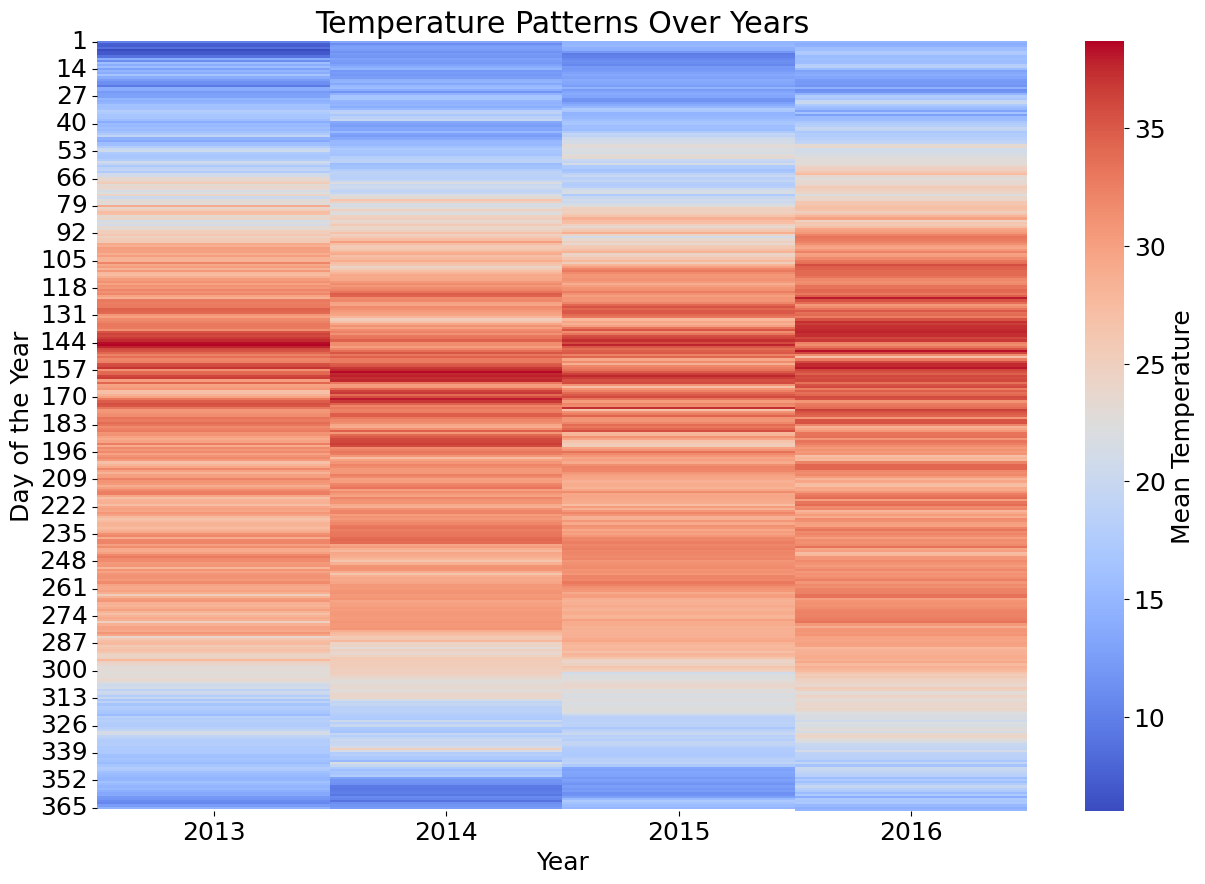

In [56]:
# set some defaults
params = {'figure.figsize': [15, 10],
          'font.size': 18}

mpl.rcParams.update(params)

sns.heatmap(pivoted_temp, cmap='coolwarm', cbar_kws={'label': 'Mean Temperature'})
plt.title('Temperature Patterns Over Years')
plt.xlabel('Year')
plt.ylabel('Day of the Year')
plt.show()


### Line plot shwing mean temperature in each year

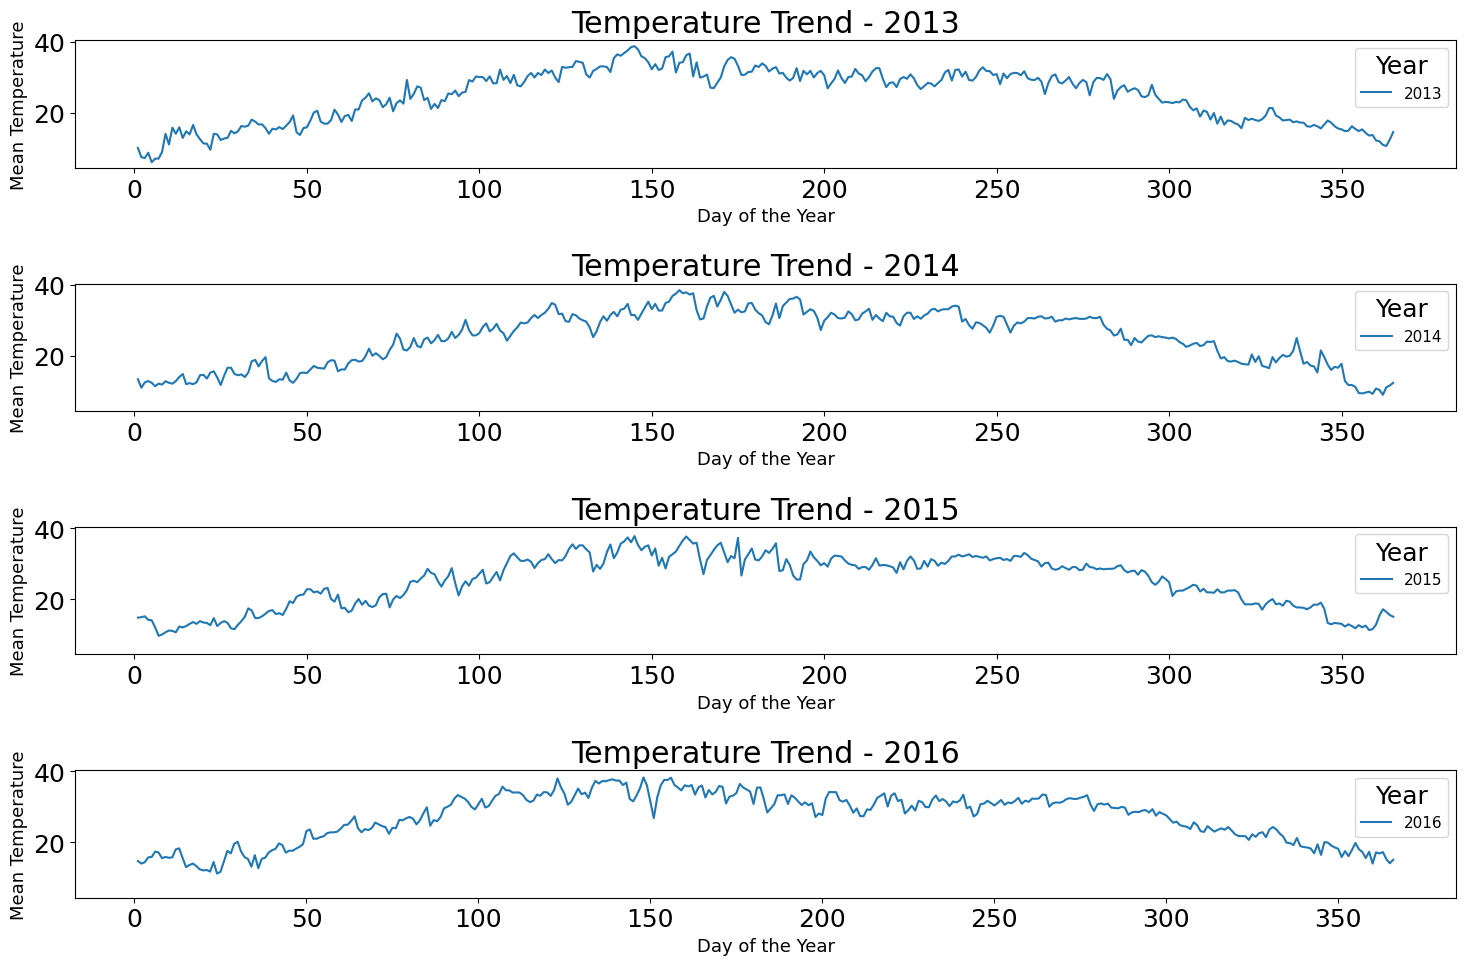

In [68]:
# Number of years
num_years = len(pivoted_temp.columns)

# Set up subplots
fig, ax = plt.subplots(nrows=4, ncols=1, sharey=True)

# Iterate through years and plot in separate subplots
for i, year in enumerate(pivoted_temp.columns):
    ax[i].plot(pivoted_temp.index, pivoted_temp[year], label=str(year))
    ax[i].set_title(f'Temperature Trend - {year}')
    ax[i].set_xlabel('Day of the Year', fontsize=13)
    ax[i].set_ylabel('Mean Temperature', fontsize=13)
    ax[i].legend(title='Year', loc='upper right', fontsize=11)

plt.tight_layout()
plt.show()

### Box plots to visualize temperature distributions for each month across different years.

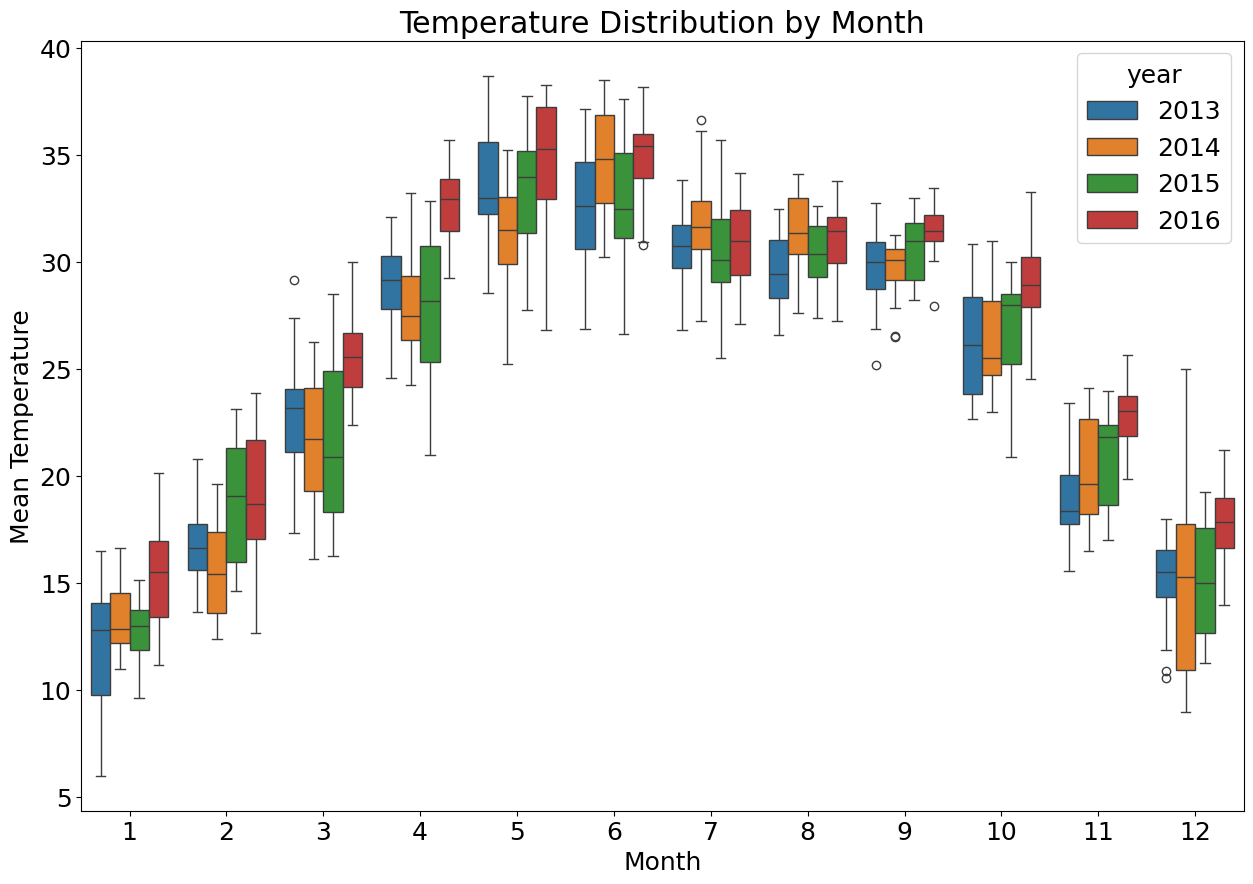

In [72]:
data['Month'] = data.index.month
sns.boxplot(x='Month', y='meantemp', hue='year', data=data)
plt.title('Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Mean Temperature')
plt.show()
